In [1]:
import numpy as np
from scipy.stats import chi2
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import norm
from scipy.optimize import minimize
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
from sklearn.utils import resample

# A

In [2]:
arr = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
n = np.sum(arr)
values = np.array([i for i in range(10)])

In [3]:
def prefix_sum(x):
    for i in range(1, 10):
        x[i] += x[i-1]
    return x

y_uniform = values/9
y_prefix = prefix_sum(arr / 100)

delta~ = 1.4333333333333331
p-value = 0.03348


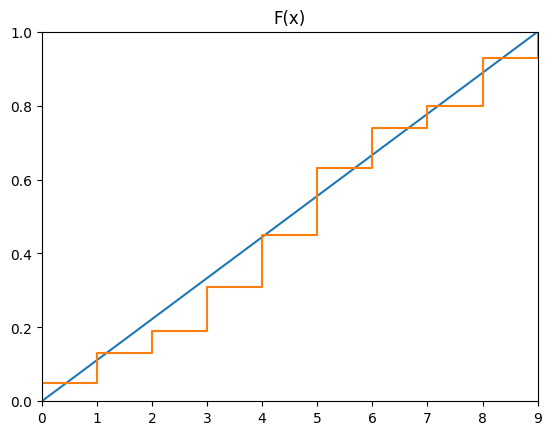

In [4]:
plt.axis([0, 9, 0, 1])
plt.title('F(x)')

plt.plot(values, y_uniform)
plt.step(values, y_prefix, where='post')
    
arr_delta1 = np.abs(y_uniform - y_prefix)
arr_delta2 = np.zeros_like(arr_delta1)
arr_delta2[1:] = abs(y_uniform[1:10] - y_prefix[0:9])
sup1 = max(arr_delta1)
sup2 = max(arr_delta2)
sup = max(sup1, sup2)
print("delta~ =", np.sqrt(n) * sup)

print("p-value = 0.03348")  # Из таблицы Колмогорова

# Б

In [5]:
intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]
counts = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]

In [6]:
data = []
for (start, end), count in zip(intervals, counts):
    midpoint = (start + end) / 2
    data.extend([midpoint] * count)

print(data)

[0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5]


In [7]:
initial_params = [np.mean(data), np.std(data)]


In [8]:
def likelihood(params):
    mu, sigma = params[0], params[1]
    if sigma <= 0:
        return np.inf
    return -np.sum(norm.logpdf(data, mu, sigma))

In [9]:
result = minimize(likelihood, initial_params, method='L-BFGS-B', bounds=[(-np.inf, np.inf), (0, np.inf)])

mu, sigma = result.x
print(f'Оценка mu: {mu}')
print(f'Оценка sigma: {sigma}')

Оценка mu: 5.27
Оценка sigma: 2.505414137423193


In [10]:
def f(x):
    global sigma, mu
    return norm.pdf(x, mu, sigma)

integral_intervals = [-np.inf, 1, 2, 3, 4, 5, 6, 7, 8, 9, np.inf]
p = np.array([integrate.quad(f, integral_intervals[i-1], integral_intervals[i])[0] for i in range(1, 11)])
print(f"p_i * n: {p}")

p_i * n: [0.04416168 0.05175522 0.08654102 0.1236538  0.1509787  0.15752502
 0.1404461  0.10700263 0.06966263 0.06827321]


In [11]:
delta = np.sum((counts - p * n) ** 2 / (p * n))
print("delta~ =", delta)

delta~ = 10.798973140500925


In [12]:
def f(x):
    return chi2.pdf(x, 7)

answer = integrate.quad(f, delta, np.inf)[0]
print(f"p-value = {answer}")

p-value = 0.14763126040115765


# Bootstrap

In [13]:
data = np.array(([0] * 5 + [1] * 8 + [2] * 6 + [3] * 12 + [4] * 14 + [5] * 18 + [6] * 11 + [7] * 6 + [8] * 13 + [9] * 7))
N = len(data)

In [14]:
# ~F(x) - эмпирическая функция
counts = np.array([np.count_nonzero(data == i) for i in range(10)])
probabilities = counts / counts.sum()
F_ = np.cumsum(probabilities)

In [15]:
values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
F = norm.cdf(values, mu, sigma)

In [16]:
arr_delta1 = np.abs(F_ - F)
arr_delta2 = np.zeros_like(arr_delta1)
arr_delta2[1:] = abs(F_[1:10] - F[0:9])
sup1 = max(arr_delta1)
sup2 = max(arr_delta2)
sup = max(sup1, sup2)

delta = np.sqrt(n) * sup
print("Delta =", np.sqrt(n) * sup)

Delta = 3.2388828767538627


In [17]:
# Bootstrap
B = 100000
bootstrap_arr = []
N_ = len(data)
for _ in range(B):
    sample = resample(data, replace = True)
    counts = np.array([np.count_nonzero(sample == i) for i in range(10)])
    probabilities = counts / counts.sum()
    F_ = np.cumsum(probabilities)
    arr_delta1 = np.abs(F_ - F)
    arr_delta2 = np.zeros_like(arr_delta1)
    arr_delta2[1:] = abs(F_[1:10] - F[0:9])
    sup1 = max(arr_delta1)
    sup2 = max(arr_delta2)
    sup = max(sup1, sup2)
    bootstrap_arr.append(np.sqrt(n) * sup)
    
lenght = len([x for x in bootstrap_arr if x <= delta]) 
p_value = lenght / B
print(f"p-value = {p_value}")

p-value = 0.50288
